### PDF Extractor
I extracted a pdf of a Blue Chip article about consumer habits during the pandemic.

In [69]:
import fitz
import pandas as pd
from collections import Counter

doc = fitz.open('BlueChip.pdf')
text = "".join(page.get_text("text") for page in doc)
words = pd.Series(text.split())
words.value_counts().head(30)

the           113
and            81
to             73
of             61
in             43
a              30
shopping       24
their          23
will           19
that           18
shoppers       18
brands         17
grocery        17
in-store       16
experience     15
2020           15
for            15
with           15
blue           15
rights         14
chip.          14
All            14
©              14
as             14
reserved.      14
be             13
new            13
retailers      13
have           12
online         12
dtype: int64

### Reddit Image Transcriber
I used the r/aww reddit thread which contains both photos and videos.

In [116]:
import requests
from PIL import Image
import io
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt
data = requests.get("https://www.reddit.com/r/tumblr.json", headers = {'User-agent': 'your bot 0.1'}).json()


In [117]:
#The title and url for each post
title = []
url = []
for i in data['data']['children']:
    title.append(i['data']['title'])
    if(i['data']['url'].endswith('.png') or i['data']['url'].endswith('.jpg')):
        url.append(i['data']['url'])
url

['https://i.redd.it/m3khoi3aoxy61.png',
 'https://i.redd.it/ol2pt7f0exy61.jpg',
 'https://i.redd.it/c1iw2m42gzy61.png',
 'https://i.redd.it/opmg0eapiyy61.png',
 'https://i.redd.it/nulj17u4exy61.jpg',
 'https://i.imgur.com/vFdyr3Q.jpg',
 'https://i.redd.it/qzdkqdx2mvy61.png',
 'https://i.redd.it/2t638rcr6zy61.jpg',
 'https://i.redd.it/crgr3jjf9yy61.jpg',
 'https://i.redd.it/i9jf9ycf5wy61.png',
 'https://i.redd.it/wbg9o6wnqzy61.png',
 'https://i.redd.it/s3nuj7fwnyy61.jpg',
 'https://i.redd.it/sjd3esjkzvy61.jpg',
 'https://i.redd.it/dyatm7dbtvy61.png',
 'https://i.redd.it/pkfvc0udbwy61.png',
 'https://i.redd.it/oxtsbb02tzy61.png',
 'https://i.redd.it/o2n9dw4rcyy61.jpg',
 'https://i.redd.it/fq8xdffa7xy61.png',
 'https://i.redd.it/pklwn6d6fyy61.jpg',
 'https://i.redd.it/kljsviv3bwy61.png',
 'https://i.redd.it/2a80ux9wkxy61.jpg',
 'https://i.redd.it/wz3ruhxt5wy61.jpg',
 'https://i.redd.it/w5tzta5cuyy61.jpg',
 'https://i.imgur.com/6H14WTm.jpg',
 'https://i.redd.it/8c8dngbgnvy61.jpg']

probably     23
image,       23
looking      23
are          23
itwas        23
             ..
thesaurus     1
cried         1
lauged        1
i             1
6,            1
Length: 96, dtype: int64


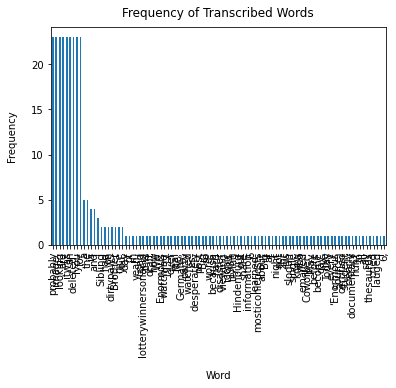

In [123]:
text = []
words = []
for u in url:
    response = requests.get(u+'.json')
    img = Image.open(io.BytesIO(response.content))
    text.append(pytesseract.image_to_string(img))
for t in text:
    words.extend(t.split())
words = pd.Series(words)
print(words.value_counts())
words.value_counts().plot(kind='bar')
plt.xlabel("Word", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Frequency of Transcribed Words", y=1.02)
plt.show()

### Face Finding
I used a stock image of a couple people standing and smiling at the camera for my image

In [119]:
import numpy as np
import cv2
import urllib
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


img = cv2.imread('stockphoto.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


In [67]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()